In [18]:
%matplotlib inline
import random
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()


In [19]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape) # noise 𝜖
    return X, y.reshape((-1, 1))

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [20]:
print('features:', features[0], '\nlabel:', labels[0])

features: [-0.5541095 -0.7778969] 
label: [5.730833]


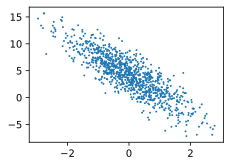

In [21]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1);

In [22]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [23]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[[-1.6258842   0.65645957]
 [ 0.15440337  0.71467626]
 [ 2.5658991   0.36946824]
 [ 1.1787738   0.3909934 ]
 [ 0.21769194 -1.3172232 ]
 [ 1.5284842  -0.6437034 ]
 [-1.547404   -1.3256844 ]
 [ 0.05415598 -0.00976884]
 [ 0.9350846   0.66970485]
 [-2.517521    1.8678213 ]] 
 [[-1.2819663]
 [ 2.0636613]
 [ 8.065049 ]
 [ 5.2262597]
 [ 9.114767 ]
 [ 9.455128 ]
 [ 5.6021447]
 [ 4.346407 ]
 [ 3.7895334]
 [-7.181454 ]]


In [24]:
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()
w, b

(array([[-0.01426779],
        [ 0.01166423]]),
 array([0.]))

In [25]:
def linreg(X, w, b): #@save
    """The linear regression model."""
    return np.dot(X, w) + b

In [26]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [27]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [28]:
learning_rate = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

train_l = loss(net(features, w, b), labels)
print(f'loss {float(train_l.mean()):f}')
for epoch in range(num_epochs):
    # get 10 datapoints at a time
    for X, y in data_iter(batch_size, features, labels):
        # how close are we to predicting the correct value?
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        # update our guesses to minimize the error
        sgd([w,b], learning_rate, batch_size)
    # ok how close are we now?
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

loss 16.411201
epoch 1, loss 0.040210
epoch 2, loss 0.000149
epoch 3, loss 0.000052


In [29]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00023448 -0.00039434]
error in estimating b: [0.0001297]
